## Chirp.

We construct chirp data with some gaussian noise.

We want to fit a smooth model to the data: SplinesDynamicModel with unknown knot number and locations.

Demonstration:
1. SplinesDynamicModel
2. NestedSampler


In [1]:
import numpy as numpy
import math

from astropy.io import ascii

from BayesicFitting import NestedSampler
from BayesicFitting import formatter as fmt
from BayesicFitting import plotFit
from BayesicFitting import Tools
import matplotlib.pyplot as plt

from BayesicFitting import SplinesDynamicModel

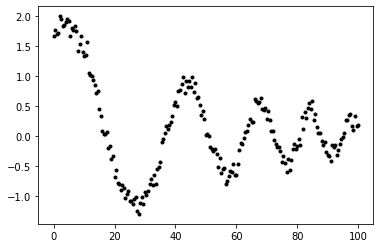

In [2]:
t = numpy.linspace( 0, 100, 201, dtype=float )
ym = 2 * numpy.sin( 2 * math.pi * numpy.exp( t / 60 ) +1 ) * numpy.exp( -0.02 * t )
y = numpy.random.seed( 12345 )
y = ym + numpy.random.randn( 201 ) * 0.1
plt.plot( t, y, 'k.' )
plt.show()

In [3]:
knots =[0, 30, 60, 100]
mxk = 15
mdl = SplinesDynamicModel( knots=knots, dynamic=True, maxKnots=mxk, minKnots=4, minDistance=0.03 )
mdl.setLimits( lowLimits=[-10.0], highLimits=[+10.0] )

# Tools.printclass( mdl )


Fit all parameters of
  DynModBasicSplines of order 3 with 4 knots.
Using a Gauss error distribution with unknown scale
Moving the walkers with   GalileanEngine  ChordEngine  BirthEngine  DeathEngine  StructureEngine
Iteration     logZ        H       LowL     npar parameters                                   scale
       0  -2.48e+07      4.6  -2.48e+07     13  [   -5.274   -0.483   -0.828    6.896 ...    0.011]


     100  -7.15e+04      5.6  -7.15e+04     11  [   -5.631    1.086   -3.222   -4.875 ...    0.158]


     200  -6.87e+03      6.6  -6.86e+03     12  [   -0.254   -1.526    2.580   -6.528 ...    0.474]


     300  -2.81e+03      7.6  -2.81e+03     11  [    6.325   -7.291   -6.134    0.453 ...    0.785]


     400  -1.94e+03      7.8  -1.93e+03     11  [   -4.468   -9.714    6.158   -4.272 ...    0.981]


     500  -1.46e+03      9.6  -1.45e+03     14  [    9.347    5.091   -1.807    5.270 ...    0.717]


     600  -1.17e+03     10.4  -1.16e+03     14  [    3.555   -1.716    7.680    1.544 ...    0.729]


     700      -957.     10.1      -947.     14  [    2.879    0.482   -7.860   -3.034 ...    0.958]


     800      -809.     11.7      -797.     12  [   -8.500   -5.390    6.477   -3.263 ...    0.937]


     900      -689.     12.3      -676.     13  [   -6.771   -0.006   -2.065   -0.138 ...    0.998]


    1000      -613.     12.8      -599.     13  [    6.420   -1.940    3.723   -8.329 ...    0.968]


    1100      -544.     14.3      -529.     14  [   -3.998    9.542   -4.827    1.026 ...    0.967]


    1200      -490.     14.5      -475.     13  [    0.702    3.238   -5.385    1.928 ...    0.937]


    1300      -447.     15.7      -431.     15  [   -6.923   -0.394    3.909   -3.738 ...    0.895]


    1400      -411.     16.8      -393.     14  [   -0.930    4.477   -2.987    4.526 ...    0.710]


    1500      -381.     17.4      -363.     10  [   -3.798    7.006   -4.023    2.846 ...    0.904]


    1600      -352.     17.9      -334.     15  [   -3.193    6.876   -2.768   -0.109 ...    0.816]


    1700      -328.     19.1      -308.     13  [    7.507   -3.730    4.312    5.247 ...    0.941]


    1800      -307.     19.6      -286.     13  [    4.464    0.918    4.233   -1.615 ...    0.886]


    1900      -289.     20.8      -267.     14  [    3.850   -2.536    1.966   -1.065 ...    0.859]


    2000      -273.     21.5      -251.     12  [   -0.072    2.989   -1.227   -2.695 ...    0.949]


    2100      -258.     22.7      -234.     13  [    4.303   -3.613    2.917   -3.373 ...    0.800]


    2200      -241.     23.9      -216.     13  [    3.785    1.578    1.323   -0.916 ...    0.601]


    2300      -225.     24.5      -199.     13  [    1.635    3.423   -0.177   -2.518 ...    0.550]


    2400      -211.     25.4      -185.     12  [    1.085   -0.463    3.724   -5.264 ...    0.663]


    2500      -199.     26.6      -171.     13  [    1.860    1.877    0.993   -2.760 ...    0.470]


    2600      -185.     27.5      -156.     14  [    1.289    3.667   -1.026   -1.928 ...    0.517]


    2700      -172.     28.5      -142.     13  [    0.728    1.127    3.659   -1.498 ...    0.513]


    2800      -161.     29.2      -131.     12  [    1.931    2.341   -0.239   -1.282 ...    0.406]


    2900      -153.     29.7      -122.     15  [    2.023    1.583    1.194   -1.409 ...    0.461]


    3000      -144.     31.3      -112.     11  [    2.424    0.947   -2.691    0.641 ...    0.415]


    3100      -134.     32.0      -101.     13  [    3.752    1.945    1.321    1.579 ...    0.381]


    3200      -123.     33.3      -89.0     12  [    1.043    2.532    0.913   -3.347 ...    0.478]


    3300      -114.     34.1      -78.6     15  [    3.360   -0.182    1.829   -2.053 ...    0.400]


    3400      -104.     35.3      -67.6     15  [    0.934    2.263    1.160   -1.604 ...    0.304]


    3500      -92.9     36.2      -55.7     10  [    2.350    2.361   -4.298    1.972 ...    0.312]


    3600      -83.0     37.2      -44.7     13  [    0.515    1.622    2.682   -4.162 ...    0.230]


    3700      -74.2     38.2      -34.9     12  [    0.972    0.860    3.465   -4.306 ...    0.227]


    3800      -67.1     38.7      -27.3     13  [    1.791    3.114   -2.728   -0.491 ...    0.305]


    3900      -59.8     39.9      -18.6     13  [    0.701    1.151    3.148   -4.630 ...    0.230]


    4000      -49.5     41.1      -7.42     15  [    1.026    1.199    3.239   -1.325 ...    0.250]


    4100      -39.9     42.6       3.77     16  [    0.987    1.932    1.884   -0.653 ...    0.244]


    4200      -28.4     43.5       15.9     14  [    0.691    1.552    2.255   -4.025 ...    0.201]


    4300      -19.5     44.0       25.6     15  [    1.095    1.404    3.235   -1.248 ...    0.199]


    4400      -10.4     45.3       36.0     13  [    1.065    2.024    2.645   -4.120 ...    0.166]


    4500      -1.33     46.1       45.6     15  [    1.870    1.800    2.639   -1.609 ...    0.163]


    4600       7.16     47.0       55.2     14  [    1.861    1.775    2.851   -3.777 ...    0.167]


    4700       14.6     47.8       63.6     13  [    2.103    1.623    3.024   -4.236 ...    0.187]


    4800       21.8     48.7       71.7     16  [    1.563    2.272    1.575    2.274 ...    0.192]


    4900       28.4     49.8       79.3     14  [    1.900    1.759    2.813   -3.945 ...    0.182]


    5000       34.0     50.3       85.3     15  [    2.268    1.534    2.973   -3.757 ...    0.138]


    5100       40.1     51.6       92.7     14  [    1.949    1.536    2.509   -3.585 ...    0.168]


    5200       44.5     52.3       98.0     15  [    1.480    1.666    2.766   -1.218 ...    0.164]


    5300       49.6     53.3       104.     15  [    2.452    1.760    2.667   -4.087 ...    0.129]


    5400       53.4     54.0       109.     15  [    1.637    2.130    1.747    2.116 ...    0.107]


    5500       57.0     55.0       113.     14  [    1.684    1.889    2.372   -3.806 ...    0.134]


    5600       60.3     55.9       117.     14  [    1.999    2.032    2.135   -3.726 ...    0.144]


    5700       63.2     56.7       121.     14  [    1.802    1.612    2.845   -3.857 ...    0.133]


    5800       66.3     57.9       126.     14  [    1.497    2.024    2.328   -3.699 ...    0.138]


    5900       69.3     59.0       130.     15  [    1.459    2.103    1.981    1.927 ...    0.108]


    6000       72.8     59.9       134.     14  [    1.696    1.885    2.384   -3.816 ...    0.119]


    6100       74.8     60.2       137.     14  [    1.613    1.643    2.595   -4.204 ...    0.118]


    6200       76.7     61.1       139.     14  [    1.695    1.961    2.060   -3.549 ...    0.126]


    6300       78.9     62.3       143.     14  [    1.572    1.863    2.484   -4.075 ...    0.125]


    6400       81.1     63.3       146.     15  [    1.371    1.944    1.798    2.127 ...    0.117]


    6500       83.4     64.4       149.     14  [    1.511    2.924   -0.493   -1.636 ...    0.131]


    6600       85.5     65.2       152.     15  [    1.377    1.922    1.973    2.033 ...    0.110]


    6700       86.9     65.8       154.     15  [    1.875    1.551    1.891    2.143 ...    0.114]


    6800       88.1     66.4       156.     15  [    1.445    2.203    1.874    1.888 ...    0.112]


    6900       89.1     67.2       158.     15  [    1.767    2.037    1.888    2.077 ...    0.120]


    7000       90.0     68.0       160.     15  [    1.577    2.036    1.912    1.972 ...    0.098]


    7100       91.1     69.1       162.     14  [    1.593    1.954    2.208   -3.606 ...    0.120]


    7200       92.1     70.0       164.     15  [    1.490    1.884    1.920    1.947 ...    0.097]


    7300       92.9     70.8       166.     15  [    1.590    2.049    1.685    2.226 ...    0.096]


    7400       93.6     71.5       167.     15  [    1.617    1.856    1.820    2.074 ...    0.104]


    7500       94.2     72.2       169.     15  [    1.631    2.011    1.837    1.834 ...    0.109]


    7600       94.7     72.9       170.     15  [    1.812    1.858    1.882    2.061 ...    0.094]


    7700       95.2     73.6       171.     15  [    1.630    1.870    1.778    2.061 ...    0.106]


    7800       95.6     74.2       172.     15  [    1.676    1.964    1.888    1.990 ...    0.099]


    7900       95.8     74.7       174.     15  [    1.729    1.888    1.853    2.278 ...    0.092]


    8000       96.1     75.2       174.     15  [    1.486    1.662    1.894    2.140 ...    0.108]


    8100       96.3     75.6       175.     15  [    1.611    1.942    1.880    2.063 ...    0.107]


    8200       96.4     76.1       177.     15  [    1.709    1.869    1.831    2.171 ...    0.094]


    8300       96.6     76.6       177.     15  [    1.636    1.781    1.857    2.312 ...    0.097]


    8400       96.7     76.9       178.     15  [    1.516    1.943    1.812    2.003 ...    0.105]


    8500       96.8     77.2       179.     15  [    1.686    1.899    1.925    1.865 ...    0.102]


    8600       96.8     77.4       180.     15  [    1.544    1.883    1.910    1.788 ...    0.104]


    8700       96.8     77.5       180.     15  [    1.557    2.008    1.845    1.907 ...    0.107]


    8800       96.8     77.6       181.     15  [    1.630    1.750    1.873    2.111 ...    0.094]


    8900       96.9     77.7       181.     15  [    1.662    1.776    1.953    1.792 ...    0.100]


    9000       96.9     77.7       181.     15  [    1.703    1.823    1.929    1.759 ...    0.098]


    9100       96.9     77.7       182.     15  [    1.593    1.767    1.884    2.075 ...    0.093]


    9200       96.9     77.7       182.     15  [    1.622    1.842    1.905    2.074 ...    0.092]


    9300       96.9     77.7       183.     15  [    1.635    1.838    1.879    1.993 ...    0.103]


    9343       96.9     77.7       183.     15 
Parameters   [    1.674    1.795    1.867    2.109   -3.864    2.691   -1.404    0.072    1.047   -1.389    1.101
                 -1.189    0.683    0.157    0.093]
Engines              success     reject     failed       best      calls
GalileanEngine         70556      24434      33983          0       9343
ChordEngine            65436     415539          0          0       9343
BirthEngine             1333      18683       2601          0       9343
DeathEngine              933       4592       3818          0       9343
StructureEngine        41854          0      42905          0       9343
Calls to LogL         739273   to dLogL      24434
Samples        9443
Evidence        42.071 +-      0.383


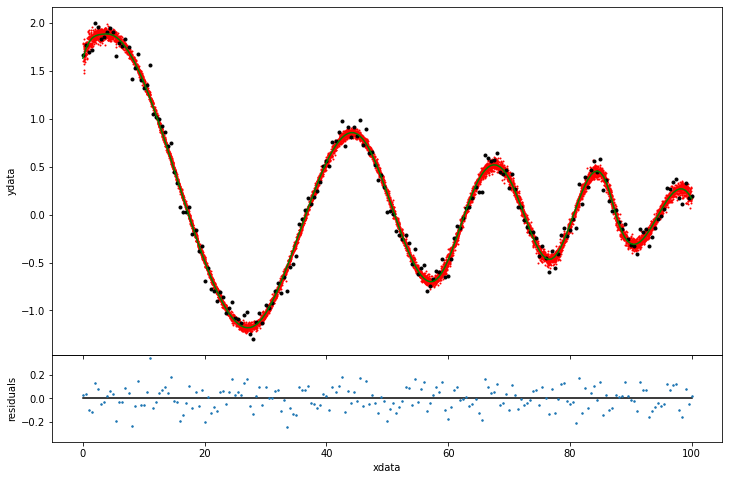

In [4]:
#eng = ["galilean", "birth", "death", "struct"]
ns = NestedSampler( t, mdl, y, seed=1235 )
ns.distribution.setLimits( [0.01,1] )
ns.minimumIterations = 1000
ns.verbose=2
#ns.engines[1].slow = 100

evid = ns.sample( plot=True )



In [5]:
sl = ns.samples
kmed = sl.getMedianIndex()
smpl = sl[kmed]
print( fmt( smpl.model.knots, max=None ) )
print( fmt( smpl.model.parameters, max=None ) )
print( fmt( sl[-1].model.knots, max=None ) )
print( fmt( sl[-1].model.parameters, max=None ) )

[    0.000    3.170    4.102   28.354   44.577   57.660   64.235   70.741   76.254   86.589   87.491  100.000]
[    1.651    1.752    2.005    2.005   -3.701    3.043   -2.017    0.264    0.467   -1.162    1.001   -1.538    0.480
     0.234]
[    0.000    2.970    3.742   28.539   44.668   58.740   62.057   68.098   77.451   84.824   89.617  100.000]
[    1.651    1.752    2.005    2.005   -3.701    3.043   -2.017    0.264    0.467   -1.162    1.001   -1.538    0.480
     0.234]


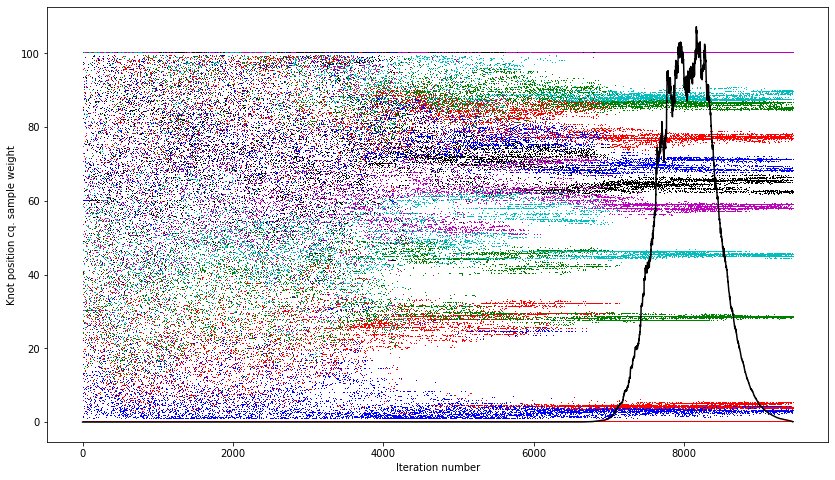

In [6]:
## Plot the evolutie of knots and sample weights
cc = ['k,', 'b,', 'r,', 'g,', 'c,', 'm,']
sl = ns.samples
ka = numpy.zeros( ( mxk, len( sl ) ), dtype=float )
for k,s in enumerate( sl ) :
    n = len( s.model.knots )
    ka[:n,k] = s.model.knots
plt.figure( 1, figsize=[14,8] )    
for j in range( mxk ) :
    plt.plot( ka[j,:], cc[j%6] )
wgts = sl.getWeightEvolution()
plt.plot( 100000 * wgts, 'k-' )
plt.xlabel( "Iteration number" )
plt.ylabel( "Knot position cq. sample weight")
plt.show()

